In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Distribution Overview

In general, distributions refer to the possible outcomes for a random event and their probabilities. How likely is some value to occur? When discussing distributions, we will discuss both **probability distributions** and **empirical probability distributions**. Empirical distributions refer to observed distributions of data, showcasing the outcomes of a repeated experiment. Probability distributions can be studied and understood without any sample or experiment and refer to theoretical likelihoods.

When we are considering a random event or phenomenon, we are interested in the outcome of the event.
A **random variable,** often denoted by uppercase letters $X$ or $Y$, is a numerical quantity representing an outcome of the event. The collection of possible outcomes, or the sample space as discussed in [Chapter 11](../../11/Probability_Intro.ipynb),
contains all possible values the random variable can take. Random variables can be either discrete, that is containing finite or countably infinite elements in its sample space, or continuous, that is containing infinite elements in its sample space.
In the case of a discrete random variable, the sample space is a set of possible outcomes. An example of this would be $\{\text{Heads}, \text{Tails} \}$ for the outcome of a coin flip.
In the case of a continuous random variable, the sample space is often an interval of possible outcomes. An example of this would be an interval of possible adult heights in inches [24, 107].

A probability distribution corresponds to a function that assigns probabilities to each possible outcome of a random variable, where the domain, or input, is the entire sample space. Such a function, usually denoted $P(X=x)$ where $X$ is a random variable and $x$ is the outcome of an event, is called a **probability mass function (pmf)** for discrete random variables.

All probabilities, $P(X=x)$, must satisfy the following criteria:
- the probability of each element occurring is greater than or equal to 0
- the sum of all probabilities of elements in the sample space equals 1  

In fact we already saw an example of a probability distribution when we drew marbles from a bag in [Chapter 10.3: Sampling](../../10/3/sampling.ipynb)!

## Discrete Example

 We formalize this idea by considering the following example. Suppose we toss a fair coin twice and record the number of heads observed as random variable $X$. We can list out all possibilities in the sample space $\{ HH, HT, TH, TT \}$, where H corresponds to heads and T to tails. We see that our random variable $X$ can be 0, 1, or 2.

From the sample space, we define the probability mass function. For example, the probability of observing 0 heads occurs when we get TT. Hence $$P(X=TT) = \frac{\text{Number of tosses with 0 heads}}{\text{Total number of possible tosses}} = \frac{1}{4}.$$ In this way, we assign all probabilities to get the following probability mass function:

|     x    |     0     |     1   |   2    |  
|:-----------------:|:-------------:|:-------------:|:-------------:|
| P(X=x) | $\frac{1}{4}$ | $\frac{2}{4}$ | $\frac{1}{4}$

Note that this does in fact satisfy both conditions of a pmf, as all probabilities are $\geq 0 $ and sum to 1.

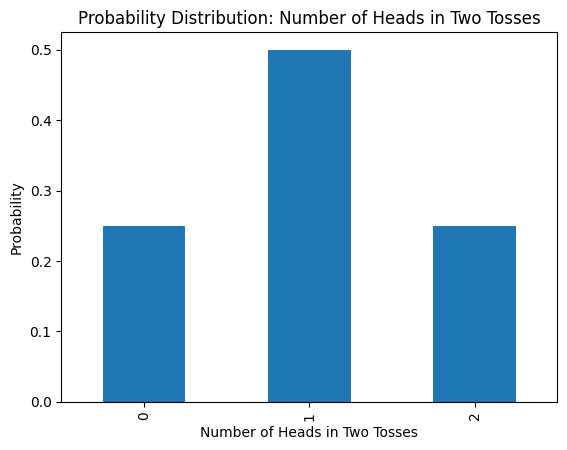

In [ ]:
probabilities =[.25, .5, .25]
prob_df = pd.DataFrame(probabilities)
prob_df.plot.bar(legend=False);

plt.title('Probability Distribution: Number of Heads in Two Tosses')
plt.xlabel('Number of Heads in Two Tosses')
plt.ylabel("Probability");

These probabilities are theoretical in the sense that in a perfect situation, we would achieve exactly these results. But what happens if we try this experiment in real life? Below we toss a coin twice and record the number of observed heads. We can repeat this experiment 5 times and compute how many times we observed 0 heads, 1 head, or 2 heads.

In [ ]:
coin = ['H', 'T']

coin_toss = np.random.choice(coin, 2)
print(coin_toss)


['H' 'T']


In [ ]:
def Coin_toss(n_sim):
  '''Takes n_sim: number of times to simulate tossing a coin twice and observing number of heads
  Outputs observed_heads array '''

  observed_heads = np.empty(0)
  for i in range(0,n_sim):
    coin_toss_output = np.random.choice(coin, 2)
    head_count = np.count_nonzero(coin_toss_output == 'H')
    observed_heads = np.append(observed_heads, head_count)
  return observed_heads


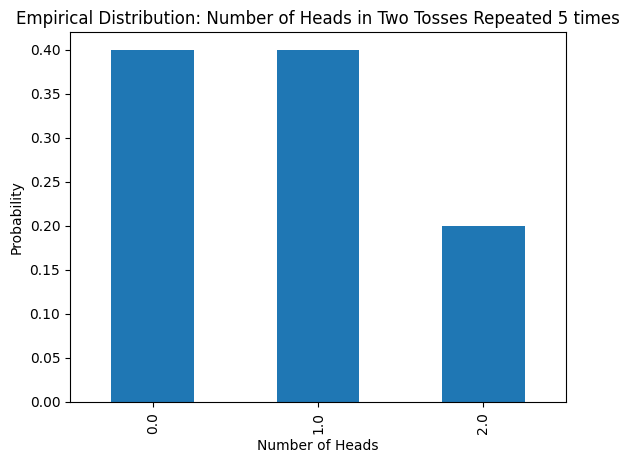

In [ ]:
np.random.seed(1234)
options, counts = np.unique(Coin_toss(5), return_counts=True)

empirical_df = pd.DataFrame(counts/5, index = options)
empirical_df.plot.bar(legend=False);


plt.title('Empirical Distribution: Number of Heads in Two Tosses Repeated 5 times')
plt.xlabel('Number of Heads')
plt.ylabel("Probability");

This is the empirical distribution of observing the number of heads from tossing a coin twice and repeating that experiment 5 times. But this does not match the probabilities we calculated in theory. Let's see what happens when we increase the number of experiments. Instead of 5, let's try 100.

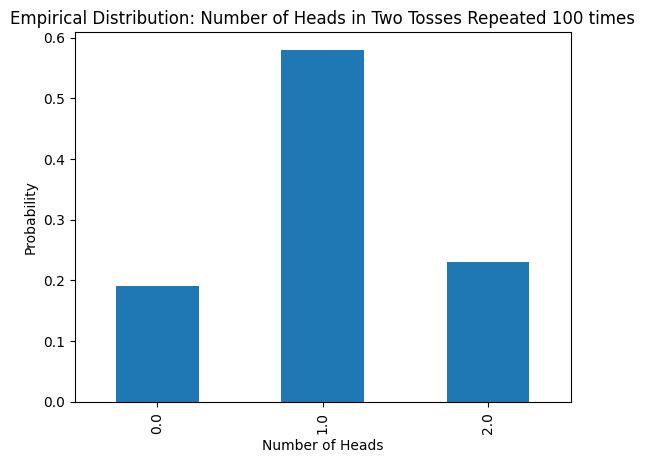

In [ ]:
np.random.seed(1234)
options, counts = np.unique(Coin_toss(100), return_counts=True)

empirical_df = pd.DataFrame(counts/100, index = options)
empirical_df.plot.bar(legend=False);


plt.title('Empirical Distribution: Number of Heads in Two Tosses Repeated 100 times')
plt.xlabel('Number of Heads')
plt.ylabel("Probability");

We see that when repeating this experiment 100 times, the probabilities start to get closer to the probabilities we calculated!

In [ ]:
print('Probability of getting 0 heads:', (counts/100)[0])
print('Probability of getting 1 head:', (counts/100)[1])
print('Probability of getting 2 heads:', (counts/100)[2])


Probability of getting 0 heads: 0.19
Probability of getting 1 head: 0.58
Probability of getting 2 heads: 0.23


Note, the probability mass function will compute the probability of getting exactly 0, 1, or 2 Heads, but we can also determine the probability of any union or intersection of the sample space! For example, $P(X=$&#39;$\text{At least One Head}$&#39;$) = P(X=$&#39;$\text{1 Head}$&#39;$ \cup $&#39;$\text{2 Heads}$&#39;$))$.

This example considers a discrete random variable, where the random variable takes on a finite or countable number of elements. We will also see that functions that assign probabilities can be applied to continuous random variables - infinitely many elements in the sample space.

## Continuous Example

Instead of a probability mass function, when considering continuous random variables we construct a **probability density function (pdf)**, from which probabilities of events can be calculated. While all probabilities in a sample space sum to 1 in the discrete case, in the continuous case this corresponds to an area of 1 under the curve of the probability density function. An example of a continuous distribution looks like the graph below.

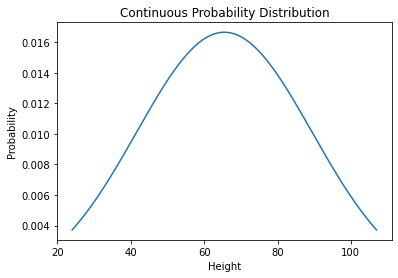

In [19]:
from scipy.stats import norm
import statistics
from scipy import stats as stats
# Ignore this code for now and focus on the output!
x_axis = np.arange(24, 107, 0.01)
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.title('Continuous Probability Distribution')
plt.xlabel('Height')
plt.ylabel("Probability");
plt.show()

An example of a continuous distribution would be choosing people at random from a sample and recording their height. This is a continuous variable as values could be in the range [24, 107] inches. We could then calculate probabilities of getting any interval subset, including unions and intersections, of the given sample space [24, 107]. For example, we can calculate $P(X=$&#39;$< 60 $&#39;$)$ or more simply $P(X < 60)$. On the probability density function, this corresponds to calculating the area under the curve to the left of 60. See below for the shaded graph.

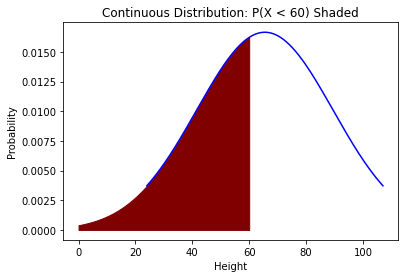

In [26]:
# Ignore this code for now and focus on the output!
x_axis = np.arange(24, 107, 0.01)

mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
iq=stats.norm(mean,sd)
plt.plot(x_axis,iq.pdf(x_axis),'b')
px=np.arange(0,60,0.01)
plt.fill_between(px,iq.pdf(px),color='maroon')

plt.title('Continuous Distribution: P(X < 60) Shaded')
plt.xlabel('Height')
plt.ylabel("Probability");
plt.show()

 However, with continuous random variables, the probability of getting a single value from the sample space, for example $P(X = 76.2)$, is always 0 as the probability of picking this exact value out of the infinite number of values in the sample space is infinitesimally small. For that reason, when discussing continuous random variables, we are interested in intervals such as $P(X < 60)$, $P(X >= 100.3)$, or $P(61.134 < X < 72.56)$. We can visualize this probability on the pdf as the area between the heights of 61.134 and 72.56.

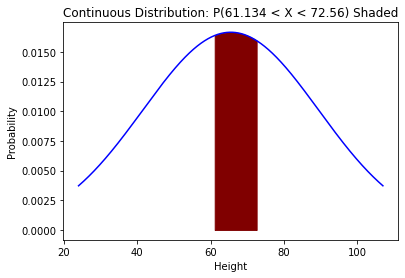

In [27]:
# Ignore this code for now and focus on the output!
x_axis = np.arange(24, 107, 0.01)

mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
iq=stats.norm(mean,sd)
plt.plot(x_axis,iq.pdf(x_axis),'b')
px=np.arange(61.134,72.56,0.01)
plt.fill_between(px,iq.pdf(px),color='maroon')

plt.title('Continuous Distribution: P(61.134 < X < 72.56) Shaded')
plt.xlabel('Height')
plt.ylabel("Probability");
plt.show()

When we are referring to either a pmf or a pdf, we will use the general term probability distribution.

## Measures of Center and Spread

The probability distribution of a random variable is useful in many ways, one of which - to summarize the data. Particularly, providing information on the *center* and *spread* of the data. There are multiple methods to measure the center of a distribution. Often the mean, mode, or median are used.
The most common measure is the **mean** or **expected value** of a random variable, defined by $\mu(X)$ or $E(X)$. This describes the average value of the sample space. For a discrete distribution, this corresponds to a weighted average, with the given probabilities as weights. For example, given $x_1, ...,x_n$ elements in a sample space with associated probabilities $p_1, p_2, ..., p_n$, we find the mean by computing 
> $\mu = \sum_{i=1}^n x_i*p_i$.


The *spread* of the data or the **variance** is symbolized by $\sigma^2(X)=Var(X)$. This describes how the data is dispersed. Another commonly used measure of spread is the **standard deviation** which is the square root of the variance and is symbolized by $\sigma(X)$. The standard deviation is a measure of how far each element is from the mean, in fact we can think of it as an average measure of how far all our data is from the mean. For a discrete distribution with $x_1, ...,x_n$ elements and associated probabilities $p_1, p_2, ..., p_n$, the variance is given by 
>$\sigma^2 = \sum_{i=1}^n (x_i - \mu)^2*p_i$.

These measures are used so often that mathematicians have found formulas to calculate them for each probability distribution. We will explore these formulas for specific probability distributions later in this chapter.

We can calculate measures of center and spread for an empirical distribution using the *sample mean* or *sample variance*. The sample mean is defined as 
>$\bar{x} = \frac{\Sigma x_i}{n}$ 

In words, to calculate the sample mean, you sum the sample items and then divide by the number of samples. The sample variance is defined as 
>$s^2 = \frac{\Sigma (x_i - \bar{x})^2}{n-1},$

and the sample standard deviation, denoted by $s$, is the square root of this. As these can be cumbersome to calculate by hand, especially for large numbers of samples, numpy has functions that will calculate these for us: `np.mean` and `np.std` .

Considering the coin toss example above, we can calculate the mean and standard deviation from the probability distribution to be

> $\mu = 0*0.25 + 1*0.5 + 2*0.25 = 1$

and

> $\sigma^2 = (0-1)^2*0.25 + (1-1)^2*0.5 +(2-1)^2*0.25 = 0.5,$

hence $\sigma = \sqrt{0.5} \approx 0.70710$.

We see a histogram of the distribution with the mean plotted in red below.

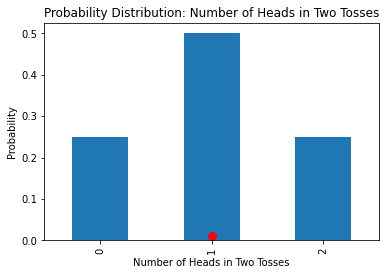

In [5]:
probabilities =[.25, .5, .25]
prob_df = pd.DataFrame(probabilities)
prob_df.plot.bar(legend=False);

plt.scatter(1, 0.01, color='red', s=60);
plt.title('Probability Distribution: Number of Heads in Two Tosses')
plt.xlabel('Number of Heads in Two Tosses')
plt.ylabel("Probability");

In the rest of this chapter, we will investigate three important probability distributions, their measures of center and spread, and how to estimate them empirically.